# Sentiment Analysis on Trump's Tweets Using Python

In [0]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = 'XEaHt4buWTWZlc3hxhOZg9Olg'
CONSUMER_SECRET = 'BW2gVn00zzZWw6KEDiOSgAIJaDdD9B0MPCKvxYbZHYRbRsza0g'

# Access:
ACCESS_TOKEN  = '1913200051-Y2gCp8N6WC1dmEXbnRg0RreOETf1He0o1qIMTfj'
ACCESS_SECRET = 'nyGC3uoEpDYyuI2RPiIAGdiqB9JlrWPHSWAksl5nWTvV7'

In [0]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [6]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name = "realDonaldTrump", count = 200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

https://t.co/QUuEBfFo44

.@RepMikeTurner  “The only time that Michael Cohen told the truth is when he pled that he is guilty.”  Also when he… https://t.co/e1W6uJ2I8x

RT @MSNBC: President Trump and First Lady Melania Trump view memorial crosses for the 23 people killed in the Alabama tornadoes. https://t.…

Unimaginable loss - Such great people! https://t.co/AV9oi8XuaE

RT @IvankaTrump: Thank you for your exemplary service to our nation Secretary Wilson! https://t.co/sYGLGmOT4X



In [7]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data = [tweet.text for tweet in tweets], columns = ['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,https://t.co/QUuEBfFo44
1,.@RepMikeTurner “The only time that Michael C...
2,RT @MSNBC: President Trump and First Lady Mela...
3,Unimaginable loss - Such great people! https:/...
4,RT @IvankaTrump: Thank you for your exemplary ...
5,RT @FLOTUS: Happy #InternationalWomensDay2019 ...
6,RT @IvankaTrump: Happy International Women’s D...
7,RT @marklevinshow: Victor Davis Hanson is on n...
8,"RT @marklevinshow: Ron DeSantis, America’s gov..."
9,RT @cvpayne: Jobs Report: Most Important High...


In [8]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [9]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1104189720211451905
2019-03-09 01:18:38
Twitter for iPhone
47297
13335
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1104189452598026241, 'id_str': '1104189452598026241', 'indices': [0, 23], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1104189452598026241/pu/img/bduTCQIc9iSzSNub.jpg', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/1104189452598026241/pu/img/bduTCQIc9iSzSNub.jpg', 'url': 'https://t.co/QUuEBfFo44', 'display_url': 'pic.twitter.com/QUuEBfFo44', 'expanded_url': 'https://twitter.com/realDonaldTrump/status/1104189720211451905/video/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1200, 'h': 675, 'resize': 'fit'}, 'small': {'w': 680, 'h': 383, 'resize': 'fit'}, 'large': {'w': 1280, 'h': 720, 'resize': 'fit'}}}]}


In [0]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [11]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,https://t.co/QUuEBfFo44,23,1104189720211451905,2019-03-09 01:18:38,Twitter for iPhone,47297,13335
1,.@RepMikeTurner “The only time that Michael C...,140,1104159474368024599,2019-03-08 23:18:27,Twitter for iPhone,46429,11322
2,RT @MSNBC: President Trump and First Lady Mela...,140,1104155456019357703,2019-03-08 23:02:29,Twitter for iPhone,0,6597
3,Unimaginable loss - Such great people! https:/...,62,1104155064116101121,2019-03-08 23:00:56,Twitter for iPhone,66175,16976
4,RT @IvankaTrump: Thank you for your exemplary ...,109,1104154105847705600,2019-03-08 22:57:07,Twitter for iPhone,0,4719
5,RT @FLOTUS: Happy #InternationalWomensDay2019 ...,69,1104151444792451073,2019-03-08 22:46:33,Twitter for iPhone,0,8950
6,RT @IvankaTrump: Happy International Women’s D...,107,1104151403600203776,2019-03-08 22:46:23,Twitter for iPhone,0,4313
7,RT @marklevinshow: Victor Davis Hanson is on n...,120,1104132286440595456,2019-03-08 21:30:25,Twitter for iPhone,0,4608
8,"RT @marklevinshow: Ron DeSantis, America’s gov...",75,1104131883061788672,2019-03-08 21:28:49,Twitter for iPhone,0,7268
9,RT @cvpayne: Jobs Report: Most Important High...,140,1104131388960206848,2019-03-08 21:26:51,Twitter for iPhone,0,5433


In [12]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 121.98


In [13]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
.@JussieSmollett - what about MAGA and the tens of millions of people you insulted with your racist and dangerous comments!? #MAGA
Number of likes: 223104
130 characters.

The tweet with more retweets is: 
RT @realDonaldTrump: Senate Democrats just voted against legislation to prevent the killing of newborn infant children. The Democrat positi…
Number of retweets: 66144
140 characters.



In [0]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

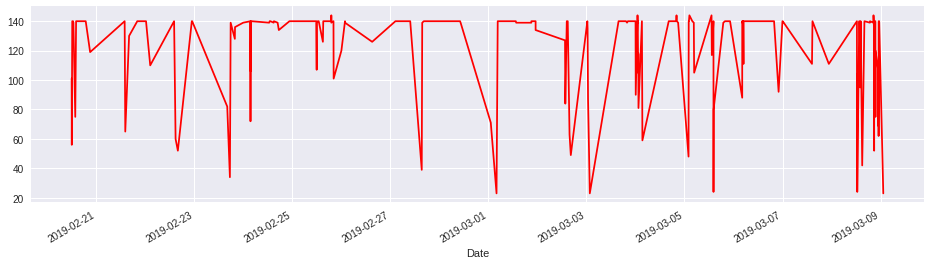

In [15]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

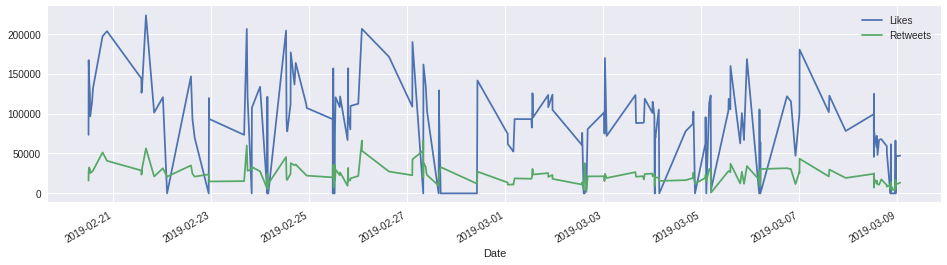

In [16]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [17]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone


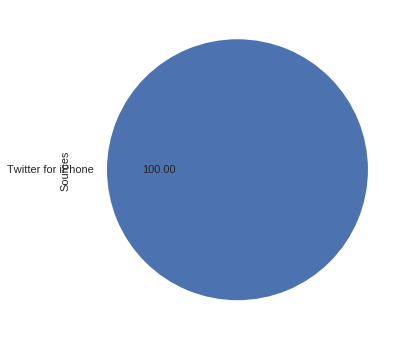

In [18]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [0]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [20]:
# We create a column with the result of the analysis:
data['SA'] = np.array([analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,https://t.co/QUuEBfFo44,23,1104189720211451905,2019-03-09 01:18:38,Twitter for iPhone,47297,13335,0
1,.@RepMikeTurner “The only time that Michael C...,140,1104159474368024599,2019-03-08 23:18:27,Twitter for iPhone,46429,11322,-1
2,RT @MSNBC: President Trump and First Lady Mela...,140,1104155456019357703,2019-03-08 23:02:29,Twitter for iPhone,0,6597,1
3,Unimaginable loss - Such great people! https:/...,62,1104155064116101121,2019-03-08 23:00:56,Twitter for iPhone,66175,16976,1
4,RT @IvankaTrump: Thank you for your exemplary ...,109,1104154105847705600,2019-03-08 22:57:07,Twitter for iPhone,0,4719,0
5,RT @FLOTUS: Happy #InternationalWomensDay2019 ...,69,1104151444792451073,2019-03-08 22:46:33,Twitter for iPhone,0,8950,1
6,RT @IvankaTrump: Happy International Women’s D...,107,1104151403600203776,2019-03-08 22:46:23,Twitter for iPhone,0,4313,1
7,RT @marklevinshow: Victor Davis Hanson is on n...,120,1104132286440595456,2019-03-08 21:30:25,Twitter for iPhone,0,4608,1
8,"RT @marklevinshow: Ron DeSantis, America’s gov...",75,1104131883061788672,2019-03-08 21:28:49,Twitter for iPhone,0,7268,0
9,RT @cvpayne: Jobs Report: Most Important High...,140,1104131388960206848,2019-03-08 21:26:51,Twitter for iPhone,0,5433,1


In [0]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [22]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 49.5%
Percentage of neutral tweets: 30.0%
Percentage de negative tweets: 20.5%
